In [ ]:
import numpy as np
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

## Data Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
# Mean normalization
mean = np.mean(x_train, axis=0)
x_train -= mean
x_test -= mean

In [ ]:
print(x_train.shape[-3:],y_train.shape)

(32, 32, 3) (50000, 100)


## Building the Model

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same',
                      input_shape=x_train.shape[-3:],kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)       

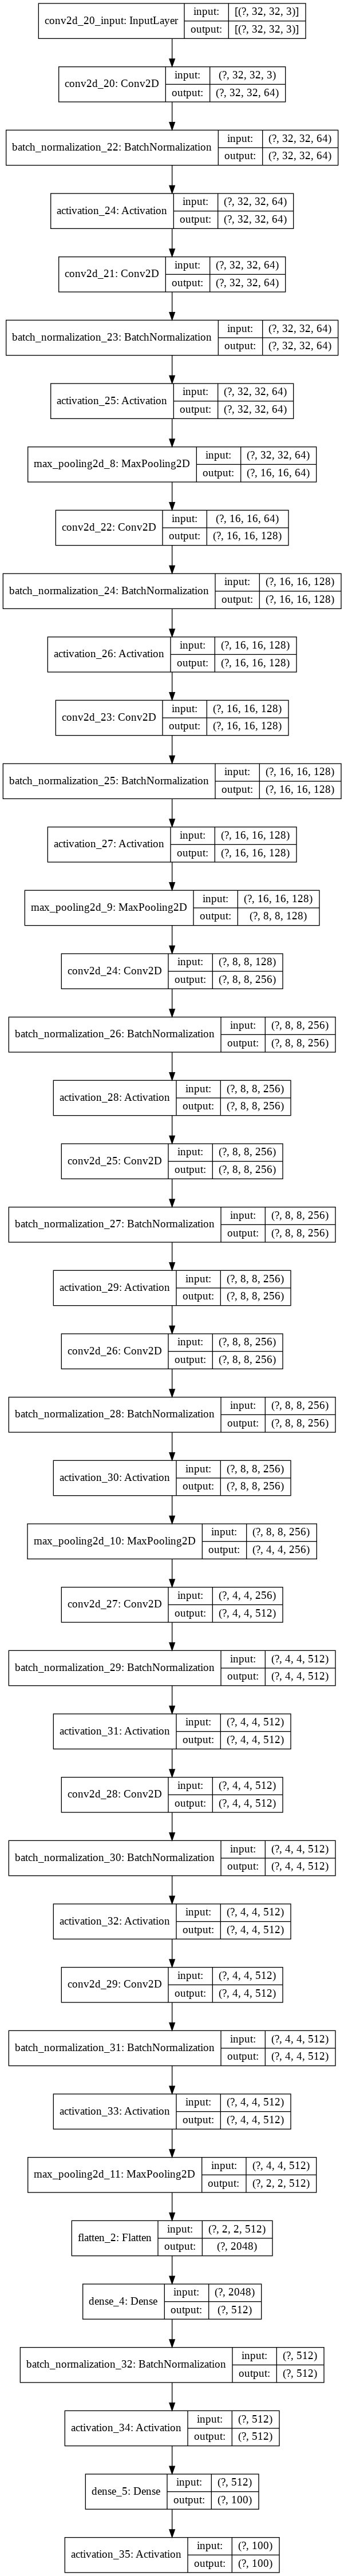

In [ ]:
model = create_model()
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Learning rate 0.035 gave best results with decay 1e-5, accuracy dropped when lr/decay was increased
sgd = optimizers.SGD(lr=0.035, decay=1e-5,momentum=0.8) #epochs=150
adam = optimizers.Adam(lr=0.001, decay = 1e-3) #epochs=80
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=5,mode='max')
checkpoint_path = "VGGNet16_SGD_BatchNormalization"
best_model = ModelCheckpoint(filepath = checkpoint_path, save_best_only=True,save_weights_only=True, monitor='val_accuracy', mode='max')
# batch size to 128 for best accuracy, it decreases if batch size is increased
history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=150,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping,best_model],verbose=2)

Epoch 1/150
391/391 - 12s - loss: 6.4009 - accuracy: 0.1731 - val_loss: 6.3938 - val_accuracy: 0.1225
Epoch 2/150
391/391 - 12s - loss: 4.8616 - accuracy: 0.3465 - val_loss: 4.7148 - val_accuracy: 0.3281
Epoch 3/150
391/391 - 12s - loss: 3.9336 - accuracy: 0.4580 - val_loss: 4.2137 - val_accuracy: 0.3689
Epoch 4/150
391/391 - 12s - loss: 3.3037 - accuracy: 0.5359 - val_loss: 3.5943 - val_accuracy: 0.4420
Epoch 5/150
391/391 - 12s - loss: 2.8481 - accuracy: 0.5982 - val_loss: 3.8549 - val_accuracy: 0.4032
Epoch 6/150
391/391 - 12s - loss: 2.5030 - accuracy: 0.6499 - val_loss: 3.5681 - val_accuracy: 0.4361
Epoch 7/150
391/391 - 12s - loss: 2.2219 - accuracy: 0.7027 - val_loss: 3.3583 - val_accuracy: 0.4600
Epoch 8/150
391/391 - 12s - loss: 2.0277 - accuracy: 0.7389 - val_loss: 3.7144 - val_accuracy: 0.4250
Epoch 9/150
391/391 - 12s - loss: 1.8667 - accuracy: 0.7772 - val_loss: 4.1368 - val_accuracy: 0.3827
Epoch 10/150
391/391 - 12s - loss: 1.7601 - accuracy: 0.8051 - val_loss: 3.6232 - 

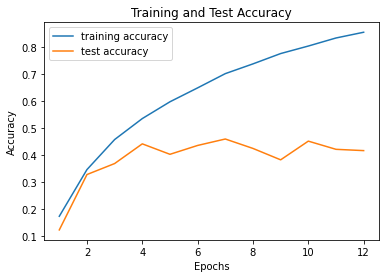

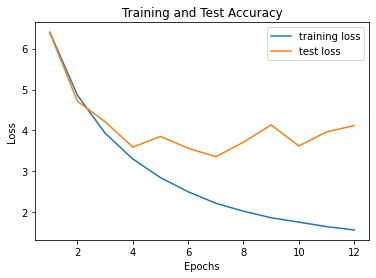

In [ ]:
#plot Accuracy vs epochs
train_metrics = history.history['accuracy']
val_metrics = history.history['val_accuracy']
epochs = range(1, len(train_metrics) + 1)
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training accuracy", 'test accuracy'])
plt.show()
#plot Validaiton loss vs epochs
train_metrics = history.history['loss']
val_metrics = history.history['val_loss']
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training loss", 'test loss'])
plt.show()

In [ ]:
model = create_model()
# checkpoint_path = "../weights/VGGNet16_SGD_BatchNormalization"
checkpoint_path = "VGGNet16_SGD_BatchNormalization"
model.load_weights(checkpoint_path)
# loss,acc = model.evaluate(x_test,  y_test, verbose=2)
# print('Test Accuracy:', acc)
prediction = model.predict(x_test).argmax(-1)
cm = confusion_matrix(y_test.argmax(axis=1), prediction)
np.set_printoptions(threshold=5000)
print(cm)
precision = precision_score(y_test.argmax(axis=1), prediction, average='weighted')

accuracy= accuracy_score(y_test.argmax(axis=1), prediction)
recall= recall_score(y_test.argmax(axis=1), prediction, average='weighted')

print('precision:', precision)
print('accuracy:', accuracy)
print('recall:', recall)

[[78  0  1 ...  0  0  0]
 [ 3 50  1 ...  0  0  0]
 [ 0  1 51 ...  0  0  0]
 ...
 [ 0  0  1 ... 29  0  0]
 [ 1  1  7 ...  0  7  1]
 [ 0  0  0 ...  0  0 55]]
precision: 0.5689688368253192
accuracy: 0.46
recall: 0.46
